In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat

import seaborn as sns

%matplotlib notebook

<IPython.core.display.Javascript object>


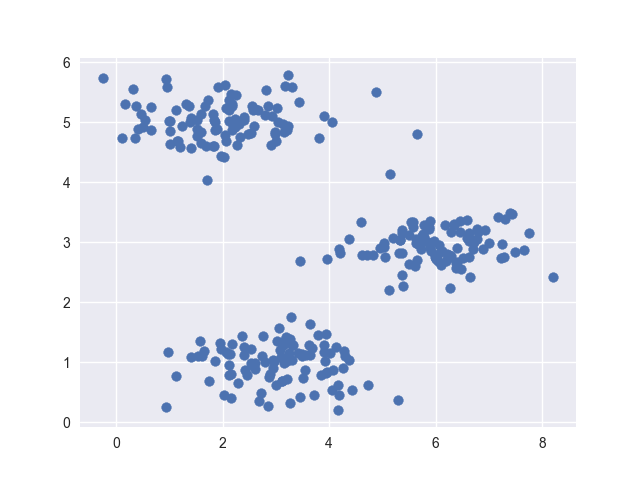

In [2]:
#read the files
mat = loadmat('../K-means/Data/ex7data2.mat')
points = mat['X'] #(300, 2)

#plot the points along with the cluster centres
fig = plt.figure()
plt.scatter(points[:,0], points[:, 1])
ax = plt.gca()


In [3]:
#this method will initialize centroid points by shuffling the array and selecting k points
def initialize_centroids(N, K):
    '''intialize centroid points by shuffling a copy of the original
    and selecting last K points'''
    
    copy = np.array(N)
    np.random.shuffle(copy)
    return(copy[:K])

In [4]:
def closest_centroid(points, centroid):
    '''Return the closest centroid to the point.
    1. subtract centroids array from the points array using numpy broadasting
    2. square the difference and sum it along axis=2, i.e. row, and then square root it
    3. get the index of least distance'''
    
    dist = np.sqrt(((points - centroid[:, np.newaxis]) ** 2).sum(axis=2))
    return np.argmin(dist, axis=0)

In [5]:
def move_centroids(points, closest, centroids):
    '''returns the new centroids assigned from the points closest to them'''
    
    return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])

# Confirm all is working fine by running it on the data points and plot an animation

<IPython.core.display.Javascript object>


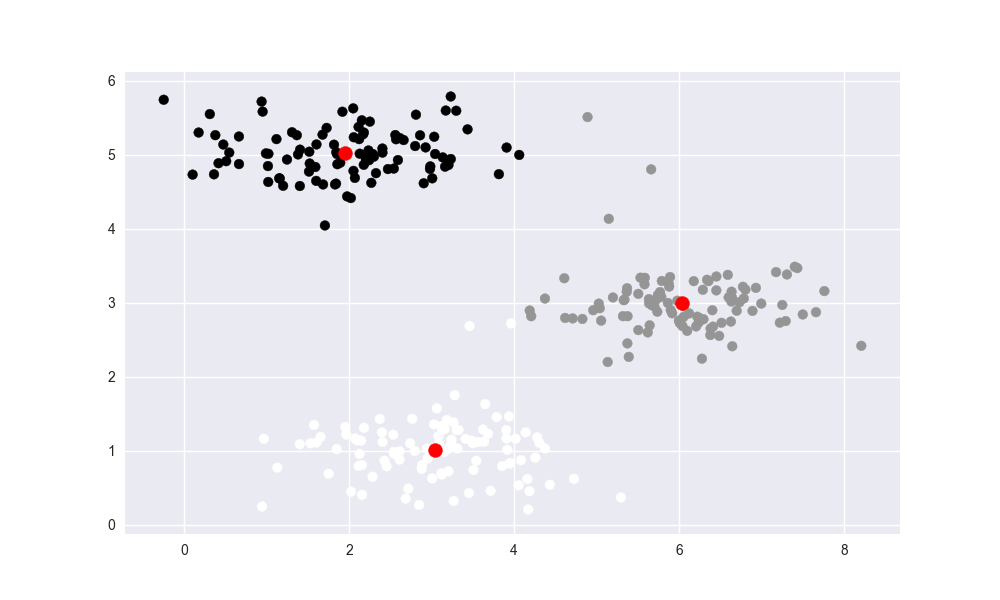

In [12]:
from matplotlib import animation

fig = plt.figure(figsize=(10,6))
ax = plt.axes(xlim=(-4, 4), ylim=(-4, 4))
centroids = initialize_centroids(points, 3) #initialize centroids

n = 10 #no of iterations for the animation
def animate(i):
    if i == n:
        a.event_source.stop() #stop the animation
    global centroids #set the centroids variable as global
    
    closest = closest_centroid(points, centroids)
    centroids = move_centroids(points, closest, centroids)
    
    #plot the data
    ax.cla() #clear the axis on every iteration
    ax.scatter(points[:, 0], points[:, 1], c=closest)
    ax.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)
     

a = animation.FuncAnimation(fig, animate, interval=200)#interval 200ms

In [7]:
def Kmeans(data, K, max_iter=0):
    '''Runs the Kmeans on data to cluster them in K centroids
    
    data: numpy array type, required
    K: int, number of clusters to tag data points in
    max_iter: no of iterations before the Kmeans returns, optional'''
    
    cent = initialize_centroids(data, K)
    
    if max_iter:
        for i in range(max_iter):
            close = closest_centroid(points=data, centroid=cent)
            cent = move_centroids(points=data, closest=close, centroids=cent)
    else:
        diff = True
        while diff:
            print diff
            prev_cen = cent
            close = closest_centroid(points=data, centroid=cent)
            cent = move_centroids(points=data, closest=close, centroids=cent)
            if np.array_equal(prev_cen, cent):
                diff = False
                
    return (close, cent)

<IPython.core.display.Javascript object>


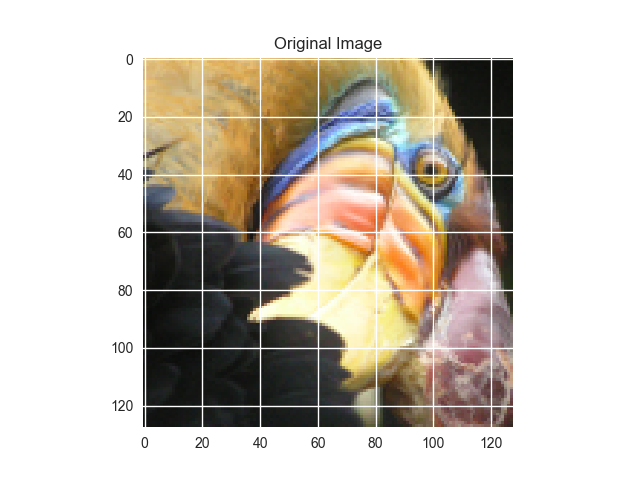

In [8]:
from skimage import io

image = io.imread('../K-means/Data/bird_small.png')
x = image.shape[0]
y = image.shape[1]

fig = plt.figure()
plt.imshow(image)
plt.title('Original Image')

image = image.astype(np.float32)/255
image = image.reshape(x*y, 3) #flatten the array

In [9]:
% time clos, centr = Kmeans(data=image, K=16, max_iter=200) 

#Run our K means 200 times on data to group it into 16 clusters

CPU times: user 2.99 s, sys: 99.8 ms, total: 3.09 s
Wall time: 3.14 s


Reconstruct the quantized image in the centroid array(16, 3) with indexes as closest points(128*128)

<IPython.core.display.Javascript object>


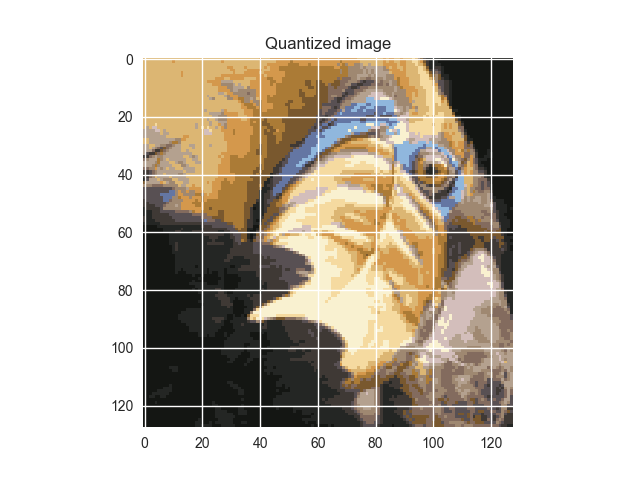

In [10]:
image_recon = centr[clos, :] 
image_recon = image_recon.reshape(x, y, 3)

#Plot the quantized image
fig = plt.figure()
plt.imshow(image_recon)
plt.title('Quantized image')